# K-Nearest Neighbors and Naive Bayes Classification

## K-Nearest Neighbors

In [8]:
# From https://github.com/probml/pyprobml/blob/auto_notebooks_md/notebooks.md#knn_classify_demo.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.patches import Circle
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
%matplotlib inline

In [9]:
# Load the data
df = pd.read_csv('loan200.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   outcome            201 non-null    object 
 1   payment_inc_ratio  201 non-null    float64
 2   dti                201 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


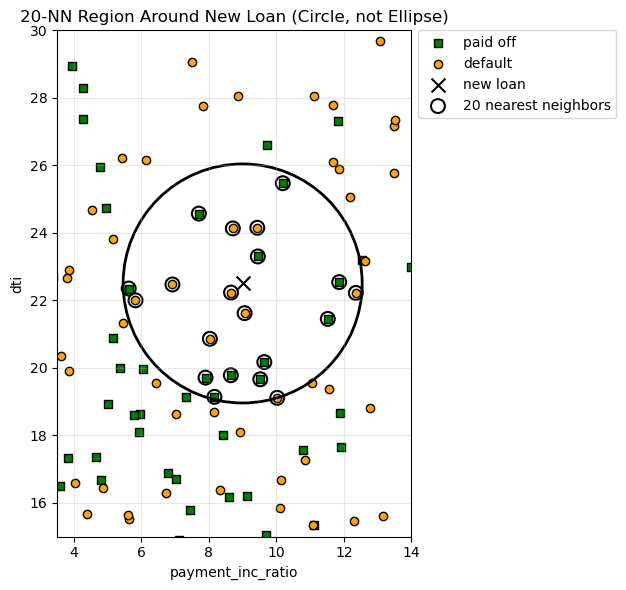

In [10]:

# The first row has outcome == "target" -> treat that as the new loan
new_row = df[df['outcome'] == 'target'].iloc[0]
x_new = np.array([ new_row['payment_inc_ratio'], new_row['dti'] ])

# The remaining rows are the training set
train_df = df[df['outcome'] != 'target'].copy()
X_train = train_df[['payment_inc_ratio', 'dti']].values
y_train = train_df['outcome'].values

# Fit a 20‐NN classifier (only to compute distances)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

#  Find the 20 nearest neighbors (distances & indices) for the new loan
distances, indices = knn.kneighbors(x_new.reshape(1, -1), n_neighbors=20)
distances = distances.ravel()
indices   = indices.ravel()

# The radius of the 20‐NN circle is the maximum of those 20 distances
radius = distances.max()

#  Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot training points:
mask_paid    = (train_df['outcome'] == 'paid off')
mask_default = (train_df['outcome'] == 'default')

ax.scatter(
    X_train[mask_paid, 0], X_train[mask_paid, 1],c='green', marker='s', edgecolor='k', label='paid off')

ax.scatter(
    X_train[mask_default, 0], X_train[mask_default, 1],c='orange', marker='o', edgecolor='k', label='default')

# Plot the new loan as a black "×"
ax.scatter(x_new[0], x_new[1],c='k', marker='x', s=100, label='new loan')

# Draw the circle around the new loan with the computed radius
circle = Circle((x_new[0], x_new[1]),radius=radius,edgecolor='black',facecolor='none',linewidth=2)
ax.add_patch(circle)

# 4d) Highlight the 20 nearest neighbors themselves
X_nn = X_train[indices] 
ax.scatter(X_nn[:, 0], X_nn[:, 1],facecolors='none', edgecolors='k', s=100, linewidths=1.5,
    label='20 nearest neighbors')

# Force equal aspect ratio so the circle is not distorted
ax.set_aspect('equal', adjustable='box')

# Final formatting
ax.set_xlabel('payment_inc_ratio')
ax.set_ylabel('dti')
ax.set_title('20‐NN Region Around New Loan (Circle, not Ellipse)')
leg = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.00), borderaxespad=0.0)

# Adjust limits with a bit of padding
ax.set_xlim(3.5, 14)
ax.set_ylim(15, 30)

ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

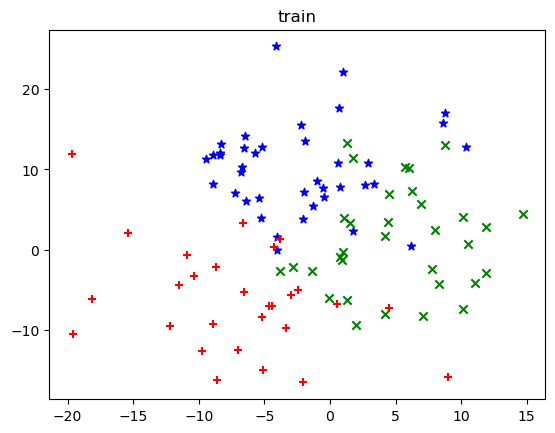

In [16]:
# KNN classifier applied to 2d dataset with 3 classes

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntrain:]
y_test = y[ntrain:]


plt.figure()
y_unique = np.unique(y_train)
markers = "*x+"
colors = "bgr"
for i in range(len(y_unique)):
    plt.scatter(x_train[y_train == y_unique[i], 0], x_train[y_train == y_unique[i], 1], marker=markers[i], c=colors[i])
plt.title("train")
plt.show()



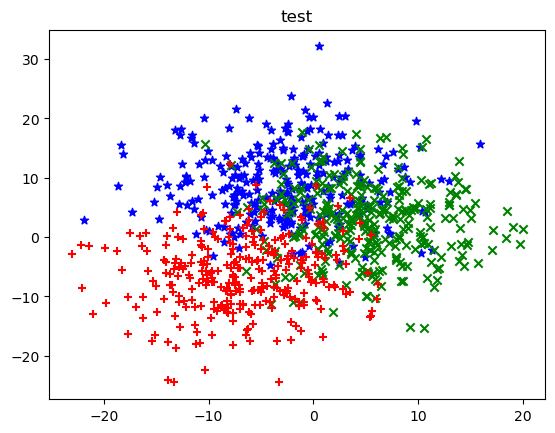

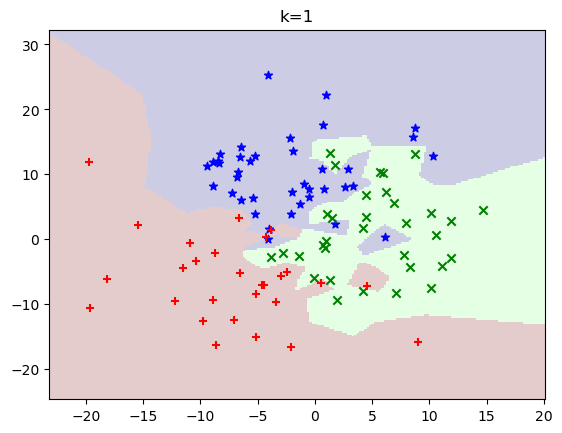

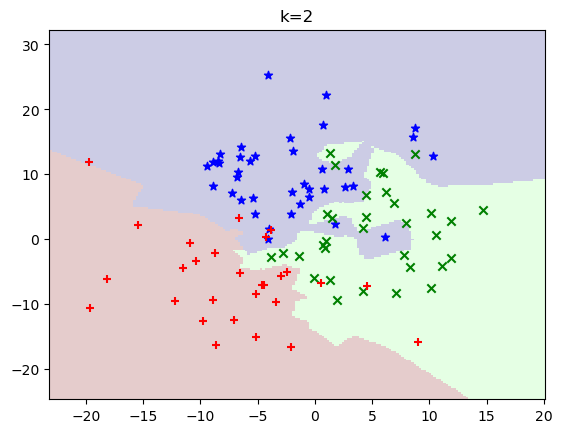

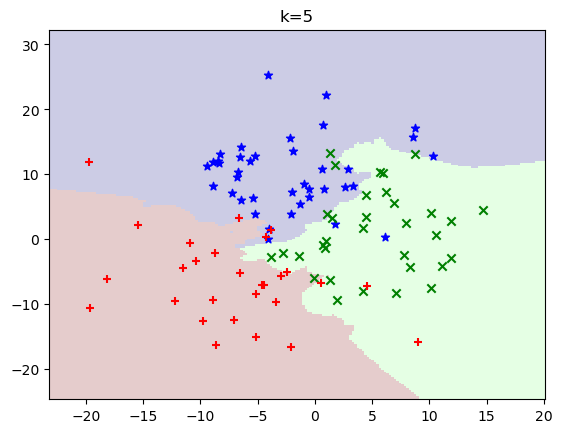

In [18]:
plt.figure()
for i in range(len(y_unique)):
    plt.scatter(x_test[y_test == y_unique[i], 0], x_test[y_test == y_unique[i], 1], marker=markers[i], c=colors[i])
plt.title("test")
plt.show()

x = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 200)
y = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 200)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

# use the knn model to predict
for k in [1, 2, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    plt.figure()
    y_predicted = knn.predict(xy)
    # plt.pcolormesh(y_predicted.reshape(200, 200), cmap='jet')
    plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap="jet", alpha=0.2)
    for i in range(len(y_unique)):
        plt.scatter(
            x_train[y_train == y_unique[i], 0], x_train[y_train == y_unique[i], 1], marker=markers[i], c=colors[i]
        )
    plt.title("k=%s" % (k))
    plt.show()


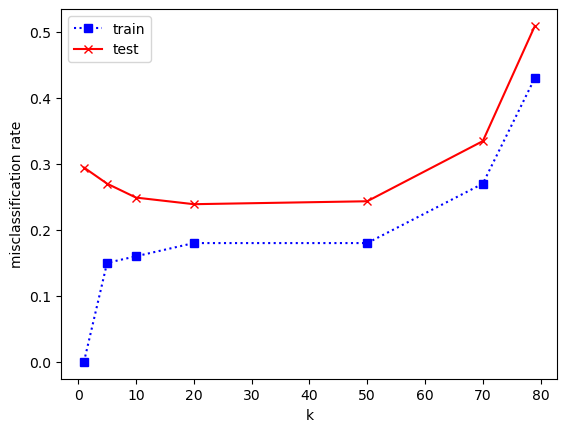

In [20]:
# plot train err and test err with different k
# ks = [int(n) for n in np.linspace(1, ntrain, 10)]
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_errs.append(1 - knn.score(x_train, y_train))
    test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, "bs:", label="train")
plt.plot(ks, test_errs, "rx-", label="test")
plt.legend()
plt.xlabel("k")
plt.ylabel("misclassification rate")
plt.show()

### Confusion matrix and Perfomance metrics

In [13]:
def evaluate_knn_threshold(X_train, y_train, X_test, y_test, k=20, threshold=0.5):
    """
    Trains a k-NN classifier on (X_train, y_train), predicts probabilities on X_test,
    then classifies as 1 if P(Y=1 | X=x) > threshold, else 0. Returns confusion matrix and performance metrics.

    Parameters:
    - X_train: numpy array of shape (n_train_samples, n_features)
    - y_train: array-like of shape (n_train_samples,), with binary labels 0 or 1
    - X_test:  numpy array of shape (n_test_samples, n_features)
    - y_test:  array-like of shape (n_test_samples,), with binary labels 0 or 1
    - k:       number of neighbors for k-NN
    - threshold: float in (0,1), classification threshold on P(Y=1 | X)

    Returns:
    - cm: confusion matrix (2×2) in the order [[TN, FP], [FN, TP]]
    - metrics: dictionary with accuracy, precision, recall, f1_score
    """
    #  Fit KNN on the training set
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Obtain predicted probabilities on the test set
    probs = knn.predict_proba(X_test)  # shape (n_test_samples, n_classes)
    # Probability for class 1 (assumes classes_ is [0,1] or similar order)
    # If class labels are not 0/1, find index of 1:
    positive_index = list(knn.classes_).index(1)
    p_positive = probs[:, positive_index]

    # Apply threshold to get final predictions
    y_pred = np.where(p_positive > threshold, 1, 0)

    # Compute confusion matrix and performance metrics
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return cm, metrics

In [14]:
# Select all rows with outcome different to outcome
df2 = df[df['outcome'] != 'target'].copy()
df2['outcome_enc'] = (df2['outcome']=='default').astype(int)


# Set features and response variables
X = df2[['payment_inc_ratio', 'dti']].values
y = df2['outcome_enc'].values

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)


In [15]:
cm, metrics = evaluate_knn_threshold(X_train, y_train, X_test, y_test, k=20, threshold=0.5)
print("Confusion Matrix:\n", cm)
print("Performance Metrics:", metrics)

Confusion Matrix:
 [[14 18]
 [14 14]]
Performance Metrics: {'accuracy': 0.4666666666666667, 'precision': 0.4375, 'recall': 0.5, 'f1_score': 0.4666666666666667}


## Naive Bayes Classifiers

In [18]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [19]:
df = pd.read_csv('Default.csv')

# Encode categorical variables
df['default_enc'] = (df['default']=='Yes').astype(int)
df['student_enc'] = (df['student']=='Yes').astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   default      10000 non-null  object 
 2   student      10000 non-null  object 
 3   balance      10000 non-null  float64
 4   income       10000 non-null  float64
 5   default_enc  10000 non-null  int32  
 6   student_enc  10000 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 468.9+ KB


,Unnamed: 0,default,student,balance,income,default_enc,student_enc
0,0,No,No,729.526495,44361.625074,0,0
1,1,No,Yes,817.180407,12106.134700,0,1
2,2,No,No,1073.549164,31767.138947,0,0
3,3,No,No,529.250605,35704.493935,0,0
4,4,No,No,785.655883,38463.495879,0,0


### Bernoulli Naive Bayes

In [20]:
def evaluate_bernoulli_nb_threshold(X_train, y_train, X_test, y_test, threshold=0.5):
    """
    Trains a BernoulliNB classifier on (X_train, y_train), predicts probabilities on X_test,
    then classifies as positive class (e.g., 'default') if P(Y=1 | X=x) > threshold, else negative.
    Returns confusion matrix and performance metrics.

    Parameters:
    - X_train: numpy array of shape (n_train_samples, n_features) with binary features (0/1).
    - y_train: array-like of shape (n_train_samples,), with binary labels (0 or 1).
    - X_test:  numpy array of shape (n_test_samples, n_features).
    - y_test:  array-like of shape (n_test_samples,), with binary labels (0 or 1).
    - threshold: float in (0,1), classification threshold on predicted probability P(Y=1 | X).

    Returns:
    - cm: confusion matrix (2×2) in the order [[TN, FP], [FN, TP]]
    - metrics: dictionary with accuracy, precision, recall, f1_score
    """
    # Fit BernoulliNB classifier
    bern_nb = BernoulliNB()
    bern_nb.fit(X_train, y_train)

    #  Obtain predicted probabilities on the test set
    probs = bern_nb.predict_proba(X_test)  # shape (n_test_samples, 2)
    p_positive = probs[:, 1]  # probability for class '1'

    # Apply threshold to get final predictions
    y_pred = np.where(p_positive > threshold, 1, 0)

    # Compute confusion matrix and performance metrics
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return cm, metrics


In [21]:
# Bernoulli Naive Bayes
# Define predictors and response
X = df[['student_enc']]
y= df.default_enc

# Splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=1, shuffle=True)

In [22]:
cm, metrics = evaluate_bernoulli_nb_threshold(X_train, y_train, X_test, y_test, threshold=0.5)
print("Confusion Matrix:\n", cm)
print("Metrics:", metrics)

Confusion Matrix:
 [[2909    0]
 [  91    0]]
Metrics: {'accuracy': 0.9696666666666667, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}


### Gaussian Naive Bayes

In [44]:
def evaluate_gaussian_nb_threshold(X_train, y_train, X_test, y_test, threshold=0.5):
    """
    Trains a GaussianNB classifier on (X_train, y_train), predicts probabilities on X_test,
    then classifies as positive class (e.g., 'default' if label 1) if P(Y=1 | X=x) > threshold,
    else negative class (0).
    Returns confusion matrix and performance metrics.

    Parameters:
    - X_train: numpy array of shape (n_train_samples, n_features) with continuous features.
    - y_train: array-like of shape (n_train_samples,), with binary labels (0 or 1).
    - X_test:  numpy array of shape (n_test_samples, n_features).
    - y_test:  array-like of shape (n_test_samples,), with binary labels (0 or 1).
    - threshold: float in (0,1), classification threshold on predicted probability P(Y=1 | X).

    Returns:
    - cm: confusion matrix (2×2) in the order [[TN, FP], [FN, TP]]
    - metrics: dictionary with accuracy, precision, recall, f1_score
    """
    # 1) Fit GaussianNB classifier
    gauss_nb = GaussianNB()
    gauss_nb.fit(X_train, y_train)

    # 2) Obtain predicted probabilities on the test set
    probs = gauss_nb.predict_proba(X_test)  # shape (n_test_samples, 2)
    p_positive = probs[:, 1]  # probability for class '1'

    # 3) Apply threshold to get final predictions
    y_pred = np.where(p_positive > threshold, 1, 0)

    # 4) Compute confusion matrix and performance metrics
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return cm, metrics


In [52]:
X = df[['balance', 'income']].values
y= df['default_enc'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
cm, metrics = evaluate_gaussian_nb_threshold(X_train, y_train, X_test, y_test, threshold=0.5)
print("Confusion Matrix:\n", cm)
print("Metrics:", metrics)

Confusion Matrix:
 [[2893   16]
 [  62   29]]
Metrics: {'accuracy': 0.974, 'precision': 0.6444444444444445, 'recall': 0.31868131868131866, 'f1_score': 0.4264705882352941}


### Comparision with KNN-Classifier

In [81]:
# Load the data
df = pd.read_csv('loan200.csv')
# Select all rows with outcome different to outcome
df2 = df[df['outcome'] != 'target'].copy()
df2['outcome_enc'] = (df2['outcome']=='default').astype(int)

# Set features and response variables
X = df2[['payment_inc_ratio', 'dti']].values
y = df2['outcome_enc'].values

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, shuffle=True)

In [79]:
cm, metrics = evaluate_gaussian_nb_threshold(X_train, y_train, X_test, y_test, threshold=0.5)
print("Confusion Matrix:\n", cm)
print("Metrics:", metrics)

Confusion Matrix:
 [[21 11]
 [10 18]]
Metrics: {'accuracy': 0.65, 'precision': 0.6206896551724138, 'recall': 0.6428571428571429, 'f1_score': 0.631578947368421}


In [97]:
cm, metrics = evaluate_knn_threshold(X_train, y_train, X_test, y_test, k=20, threshold=0.5)
print("Confusion Matrix:\n", cm)
print("Metrics:", metrics)

Confusion Matrix:
 [[14 18]
 [14 14]]
Metrics: {'accuracy': 0.4666666666666667, 'precision': 0.4375, 'recall': 0.5, 'f1_score': 0.4666666666666667}
